# BuildSys 2020 Figures
The point of this notebook is to generate good quality figures for the BuildSys 2020 conference.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Package Import

In [1]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.animation as animation

# Overview of Figures
There are few figures we want to create for the poster. In general, we want to create four figures:
1. Beacon
2. Fitbit
3. Beiwe
4. Combination of the previous three

Zoltan is also very adamant about animating our figures, so we need to look into that. He sent a [link](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1) that has some promising information. 

## Animation Test
More information on animation can be found using these blog posts:
- [Somewhat Helpful](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [More Helpful](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)

And documentation on the main animate function is [here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.animation.FuncAnimation.html)

In [2]:
beacon_data = pd.read_csv('../data/processed/bpeace2-beacon.csv',index_col=0,parse_dates=True)
# show it off:
beacon_data.head()

,TVOC,eCO2,Lux,Visible,Infrared,NO2,T_NO2,RH_NO2,CO,T_CO,...,PM_N_10,PM_C_1,PM_C_2p5,PM_C_4,PM_C_10,z,Beacon,Beiwe,Fitbit,REDCap
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4
2020-06-11 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,idbkjh8u,22,4


In [3]:
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]

normalized_df = (beacon_bb_pollutants-beacon_bb_pollutants.min())/(beacon_bb_pollutants.max()-beacon_bb_pollutants.min())

In [4]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


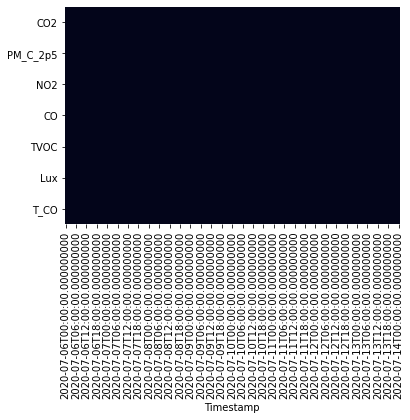

In [5]:
#%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()
frames = 50
def init():
    initial = normalized_df.T
    initial = initial.replace(initial, 0)
    sns.heatmap(initial, vmax=1, cbar=False)

def animate(i):
    data = normalized_df.T[normalized_df.T < i/frames]
    sns.heatmap(data, vmax=1, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=1000, repeat = False)
anim.save('../test_heatmap.mp4', writer=writer)

# Beacon 

<div class="alert alert-block alert-success">
    We are looking for a good summary of a week's worth of data. Looks:
    <ul>
        <li>week of July 6 is a good place to start</li>
        <li>Beacon 19</li>
    </ul>
    </div>

In [6]:
def create_cmap(colors,nodes):
    cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return cmap

## Static Plot

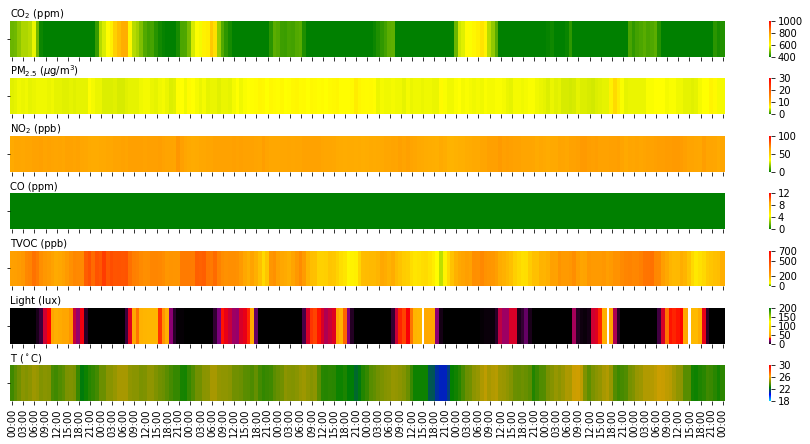

In [17]:
# Creating the dataframe
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]
fig, axes = plt.subplots(7,1,figsize=(16,7),sharex=True)
ylabels = ['CO$_2$',
           'PM$_{2.5}$',
           'NO$_2$',
           'CO',
           'TVOC',
           'Light',
           'T']
other_ylabels = ['ppm','$\mu$g/m$^3$','ppb','ppm','ppb','lux', '$^\circ$C']
cbar_ticks = [np.arange(400,1200,200),
          np.arange(0,40,10),
          np.arange(0,120,50),
          np.arange(0,15,4),
          [0,200,500,700],
          np.arange(0,250,50),
          np.arange(18,32,4)]
cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
         create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
         create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
for ax, var, low, high, ylabel, other_y, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,other_ylabels,cbar_ticks,cmaps):
    sns.heatmap(beacon_bb_pollutants[[var]].T,vmin=low,vmax=high,ax=ax,cbar_kws={'ticks':ticks},cmap=cmap)
    ax.set_ylabel('')
    ax.text(0,-0.1,f'{ylabel} ({other_y})')
    ax.set_yticklabels([''])
    ax.set_xlabel('')

xlabels = ax.get_xticklabels()
new_xlabels = []
for label in xlabels:
    new_xlabels.append(label.get_text()[11:16])

ax.set_xticklabels(new_xlabels)


plt.subplots_adjust(hspace=0.6)
plt.savefig('../reports/BuildSys2020/beacon_heatmap.pdf',bbox_inches='tight')
plt.show()
plt.close()

## Animation

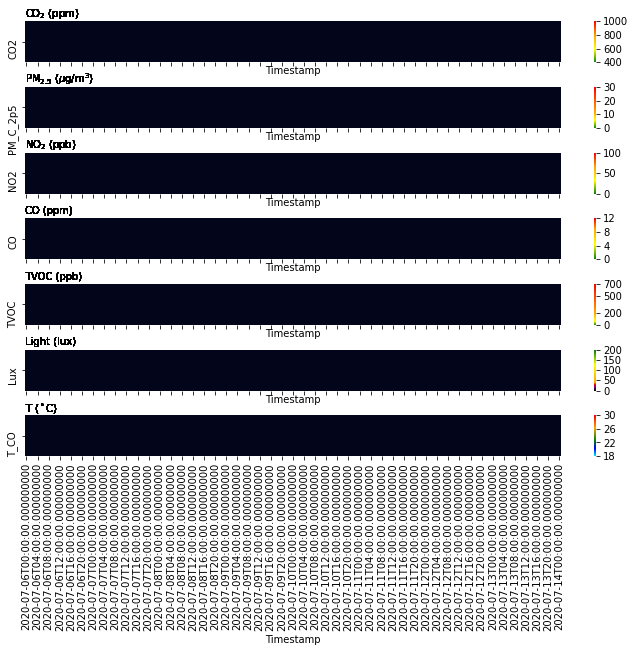

In [18]:
#%matplotlib notebook
# Creating the dataframe
beacon_bb = beacon_data[beacon_data['Beacon'] == 19][datetime(2020,7,6):datetime(2020,7,14)]
beacon_bb = beacon_bb.resample('60T').mean()
beacon_bb_pollutants = beacon_bb[['CO2','PM_C_2p5','NO2','CO','TVOC','Lux','T_CO']]
# creating the figure
fig, axes = plt.subplots(7,1,figsize=(12,8),sharex=True)
ylabels = ['CO$_2$',
               'PM$_{2.5}$',
               'NO$_2$',
               'CO',
               'TVOC',
               'Light',
               'T']
other_ylabels = ['ppm','$\mu$g/m$^3$','ppb','ppm','ppb','lux', '$^\circ$C']
cbar_ticks = [np.arange(400,1200,200),
              np.arange(0,40,10),
              np.arange(0,120,50),
              np.arange(0,15,4),
              [0,200,500,700],
              np.arange(0,250,50),
              np.arange(18,32,4)]
cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
         create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
         create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
         create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
for ax, var, low, high, ylabel, other_y, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,other_ylabels,cbar_ticks,cmaps):
    sns.heatmap(beacon_bb_pollutants[[var]].T,vmin=low,vmax=high,ax=ax,cbar_kws={'ticks':ticks},cmap=cmap)
    ax.set_ylabel('')
    ax.text(0,-0.1,f'{ylabel} ({other_y})')
    ax.set_yticklabels([''])
    ax.set_xlabel('')
    
xlabels = ax.get_xticklabels()
new_xlabels = []
for label in xlabels:
    new_xlabels.append(label.get_text()[11:16])

ax.set_xticklabels(new_xlabels)
plt.subplots_adjust(hspace=0.6)

# Animation
frames = 193
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
def init():
    initial = beacon_bb_pollutants
    initial = initial.replace(initial, 0)
    for ax, var in zip(axes,beacon_bb_pollutants.columns):
        sns.heatmap(initial[[var]].T, cbar=False, ax=ax)
    plt.subplots_adjust(hspace=0.6)
def animate(i):
    ylabels = ['CO$_2$',
               'PM$_{2.5}$',
               'NO$_2$',
               'CO',
               'TVOC',
               'Light',
               'T']
    other_ylabels = ['ppm','$\mu$g/m$^3$','ppb','ppm','ppb','lux', '$^\circ$C']
    cbar_ticks = [np.arange(400,1200,200),
              np.arange(0,40,10),
              np.arange(0,120,50),
              np.arange(0,15,4),
              [0,200,500,700],
              np.arange(0,250,50),
              np.arange(18,32,4)]
    cmaps = [create_cmap(["green", "yellow", "orange", "red",],[0.0, 0.33, 0.66, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.2, 0.4, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.33, 0.66, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.375, 0.75, 1]),
             create_cmap(["green", "yellow", "orange", "red"],[0.0, 0.1, 0.31, 1]),
             create_cmap(["black","purple","red","orange","yellow","green"],[0.0, 0.1, 0.16, 0.2, 0.64, 1]),
             create_cmap(["cyan","blue","green","orange","red"],[0.0, 0.2, 0.4, 0.7, 1])]
    for ax, var, low, high, ylabel, other_y, ticks, cmap in zip(axes,beacon_bb_pollutants.columns,[400,0,0,0,0,0,18],[1000,30,100,12,700,200,30],ylabels,other_ylabels,cbar_ticks,cmaps):
        df = beacon_bb_pollutants[[var]].T
        #df = df[df <= np.nanmax(df)*((i+1)/frames)]
        df = df.iloc[:,:i+1]
        sns.heatmap(df,vmin=low,vmax=high,ax=ax,cbar=False,cmap=cmap)
        ax.set_ylabel('')
        ax.text(0,-0.1,f'{ylabel} ({other_y})')
        ax.set_yticklabels([''])
        ax.set_xlabel('')
        
    xlabels = ax.get_xticklabels()
    new_xlabels = []
    for label in xlabels:
        if label.get_text()[11:13] == '00':
            new_xlabels.append(label.get_text()[5:10] + ' ' + label.get_text()[11:16])
        else:
            new_xlabels.append(label.get_text()[11:16])
        
    ax.set_xticklabels(new_xlabels)
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=500, repeat = False)
anim.save('../reports/BuildSys2020/beacon_heatmap.mp4', writer=writer)


# Fitbit
In terms of purely Fitbit data, I was thinking of just showing something simple like daily steps with an overlay of the hourly numbers.

In [23]:
fb_hourly = pd.read_csv('../data/processed/bpeace2-fitbit-intraday.csv',
                       index_col=0,parse_dates=True,infer_datetime_format=True)
fb_hourly.head()

,activities_calories,activities_steps,activities_distance,activities_heart,beiwe
date,,,,,
2020-05-13 17:39:00,1.69377,NaN,NaN,77.333333,hfttkth7
2020-05-13 17:40:00,1.69377,NaN,NaN,77.600000,hfttkth7
2020-05-13 17:41:00,4.42986,33.0,0.015721,79.000000,hfttkth7
2020-05-13 17:42:00,1.69377,NaN,NaN,83.416667,hfttkth7
2020-05-13 17:43:00,1.43319,NaN,NaN,63.666667,hfttkth7


In [24]:
fb_daily = pd.read_csv('../data/processed/bpeace2-fitbit-daily.csv',
                       index_col=0,parse_dates=True,infer_datetime_format=True)
fb_daily.head()

,activities_calories,activities_caloriesBMR,activities_steps,activities_distance,activities_minutesSedentary,activities_minutesLightlyActive,activities_minutesFairlyActive,activities_minutesVeryActive,activities_activityCalories,body_bmi,body_fat,body_weight,foods_log_caloriesIn,foods_log_water,beiwe
date,,,,,,,,,,,,,,,
2020-05-13,2781.0,1876.0,9207,4.396294,1241,70,118,11,1097.0,23.754,0.0,180.0,0.0,0.0,hfttkth7
2020-05-14,3727.0,1876.0,15207,7.261114,614,263,134,23,2234.0,23.754,0.0,180.0,0.0,0.0,hfttkth7
2020-05-15,3909.0,1876.0,14556,8.028501,577,205,57,108,2381.0,23.754,0.0,180.0,0.0,0.0,hfttkth7
2020-05-16,3927.0,1876.0,18453,8.748670,760,176,24,151,2364.0,23.754,0.0,180.0,0.0,0.0,hfttkth7
2020-05-17,4180.0,1876.0,15425,7.973149,605,207,50,131,2652.0,23.754,0.0,180.0,0.0,0.0,hfttkth7


The participant that corresponds to beacon 19 is qh34m4r9. We will continue to use this participant, at least initially to make sure all the data overlap.

In [29]:
fb19_hourly = fb_hourly[fb_hourly['beiwe'] == 'qh34m4r9'][datetime(2020,7,6):datetime(2020,7,14)]
fb19_hourly = fb19_hourly.resample('60T').sum()
fb19_hourly.head()

,activities_calories,activities_steps,activities_distance,activities_heart
date,,,,
2020-07-06 00:00:00,1.41405,0.0,0.0,3567.452309
2020-07-06 01:00:00,8.74140,0.0,0.0,3515.209812
2020-07-06 02:00:00,4.24215,0.0,0.0,3490.674603
2020-07-06 03:00:00,2.82810,0.0,0.0,3361.393939
2020-07-06 04:00:00,8.48430,0.0,0.0,3390.194877


In [30]:
fb19_daily = fb_daily[fb_daily['beiwe'] == 'qh34m4r9'][datetime(2020,7,6):datetime(2020,7,14)]
fb19_daily.head()

,activities_calories,activities_caloriesBMR,activities_steps,activities_distance,activities_minutesSedentary,activities_minutesLightlyActive,activities_minutesFairlyActive,activities_minutesVeryActive,activities_activityCalories,body_bmi,body_fat,body_weight,foods_log_caloriesIn,foods_log_water,beiwe
date,,,,,,,,,,,,,,,
2020-07-06,1947.0,1851.0,637,0.290752,974,28,0,0,109.0,26.785088,0.0,185.0,0.0,0.0,qh34m4r9
2020-07-07,2599.0,1851.0,6086,2.777970,738,238,0,0,977.0,26.785088,0.0,185.0,0.0,0.0,qh34m4r9
2020-07-08,2500.0,1851.0,6605,3.014396,896,111,7,34,789.0,26.785088,0.0,185.0,0.0,0.0,qh34m4r9
2020-07-09,2248.0,1851.0,2574,1.174895,804,109,0,0,442.0,26.785088,0.0,185.0,0.0,0.0,qh34m4r9
2020-07-10,2374.0,1851.0,3208,1.464342,773,157,0,0,612.0,26.785088,0.0,185.0,0.0,0.0,qh34m4r9


## Static Plot

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


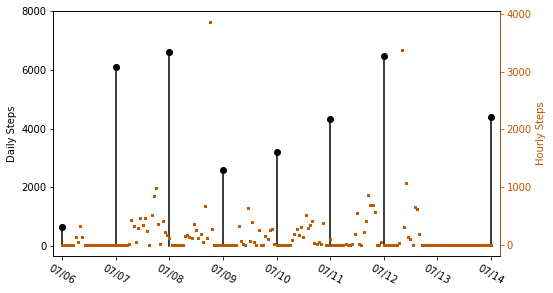

In [64]:
fig, ax1 = plt.subplots(figsize=(8,4.5))
ax2 = ax1.twinx() 

# Daily Steps - Bar
ax1.stem(fb19_daily.index, fb19_daily['activities_steps'], linefmt='k-',markerfmt='ko',basefmt='w ')
# Formatting the x-axis
ax1.xaxis.set_tick_params(rotation=-30)
ax1.set_xlim([datetime(2020,7,5,20),datetime(2020,7,14,4)])

# Formatting the y-axis (daily)
ax1.set_yticks([0,2000,4000,6000,8000])
ax1.set_ylabel('Daily Steps')

# Hourly Steps - Time Series
scatter_color = '#bf5700'
ax2.scatter(fb19_hourly.index.values, fb19_hourly['activities_steps'].values,marker='s',s=5,color=scatter_color)

# Formatting the y-axis (hourly)
ax2.set_yticks([0,1000,2000,3000,4000])
ax2.spines['right'].set_color(scatter_color)
ax2.yaxis.label.set_color(scatter_color)
ax2.tick_params(axis='y', colors=scatter_color)
ax2.set_ylabel('Hourly Steps')

# Formatting the x-axis (again)
ax2.xaxis.set_major_locator(mdates.DayLocator())
myFmt = mdates.DateFormatter('%m/%d')
ax2.xaxis.set_major_formatter(myFmt)

# Saving
plt.savefig('../reports/BuildSys2020/fitbit_steps.pdf')
plt.show()
plt.close()

# Beiwe
The best and simplest thing I can think to do with Beiwe is to include the submission times for the morning and weekly surveys.

In [48]:
ema_morning = pd.read_csv('../data/processed/bpeace2-morning-survey.csv',
                         index_col=0,parse_dates=True,infer_datetime_format=True)
ema_morning.sort_index(inplace=True)
ema_morning.head()

,ID,Content,Stress,Lonely,Sad,Energy,TST,SOL,NAW,Restful
2020-06-01 10:21:21,ewvz3zm1,1.0,0.0,0.0,0.0,1.0,7.0,10.0,3.0,2.0
2020-06-01 10:31:50,awa8uces,2.0,1.0,0.0,0.0,2.0,7.0,10.0,0.0,2.0
2020-06-01 10:42:24,hcpu5myv,3.0,0.0,0.0,1.0,1.0,8.0,10.0,1.0,2.0
2020-06-01 11:17:50,y1tvkx14,3.0,0.0,0.0,0.0,0.0,7.0,60.0,2.0,1.0
2020-06-01 11:55:10,lkkjddam,1.0,2.0,0.0,2.0,2.0,7.0,15.0,4.0,2.0


In [49]:
ema_evening = pd.read_csv('../data/processed/bpeace2-evening-survey.csv',
                         index_col=0,parse_dates=True,infer_datetime_format=True)
ema_evening.sort_index(inplace=True)
ema_evening.head()

,ID,Content,Stress,Lonely,Sad,Energy
2020-06-01 10:42:42,hcpu5myv,3.0,0,1.0,1,1
2020-06-01 12:29:13,kyj367pi,2.0,1,0.0,0,3
2020-06-01 14:01:37,axk49ssu,2.0,1,0.0,1,2
2020-06-01 14:17:05,awa8uces,2.0,1,0.0,0,1
2020-06-01 14:19:37,idbkjh8u,1.0,1,0.0,0,2


In [50]:
morning_b19 = ema_morning[ema_morning['ID'] == 'qh34m4r9'][datetime(2020,7,6):datetime(2020,7,14)]
morning_b19.head()

,ID,Content,Stress,Lonely,Sad,Energy,TST,SOL,NAW,Restful
2020-07-06 09:41:46,qh34m4r9,3.0,1.0,0.0,0.0,1.0,7.0,20.0,2.0,2.0
2020-07-08 09:07:50,qh34m4r9,3.0,1.0,0.0,0.0,2.0,6.0,10.0,0.0,2.0
2020-07-10 09:03:00,qh34m4r9,3.0,0.0,0.0,0.0,2.0,7.0,20.0,5.0,2.0
2020-07-12 09:04:33,qh34m4r9,3.0,1.0,0.0,0.0,3.0,8.0,20.0,4.0,2.0
2020-07-13 09:25:00,qh34m4r9,3.0,0.0,0.0,0.0,3.0,7.0,30.0,4.0,2.0


In [51]:
evening_b19 = ema_evening[ema_evening['ID'] == 'qh34m4r9'][datetime(2020,7,6):datetime(2020,7,14)]
evening_b19.head()

,ID,Content,Stress,Lonely,Sad,Energy
2020-07-06 20:12:05,qh34m4r9,3.0,0,0.0,0,2
2020-07-08 19:12:40,qh34m4r9,3.0,0,0.0,0,3
2020-07-10 21:50:27,qh34m4r9,3.0,0,0.0,0,3
2020-07-12 19:28:59,qh34m4r9,3.0,0,0.0,0,3
2020-07-13 20:54:12,qh34m4r9,3.0,0,0.0,0,2


## Static Plot

### First attempt
Not well-received primarily because the way contentment is framed compared to the other moods.

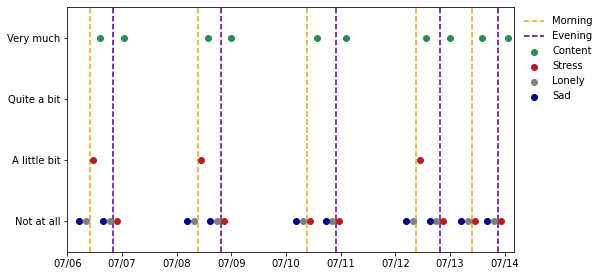

In [63]:
fig, ax = plt.subplots(figsize=(8,4.5))
# Plotting submission Times
for i in range(len(morning_b19)):
    if i == 0:
        ax.axvline(morning_b19.index[i],color='goldenrod',linestyle='dashed',zorder=1,label='Morning')
        ax.axvline(evening_b19.index[i],color='indigo',linestyle='dashed',zorder=2,label='Evening')
    else:
        ax.axvline(morning_b19.index[i],color='goldenrod',linestyle='dashed',zorder=1)
        ax.axvline(evening_b19.index[i],color='indigo',linestyle='dashed',zorder=2)
    
# Plotting mood scores
i = 0
for df in [morning_b19,evening_b19]:
    for mood, color, offset in zip(['Content','Stress','Lonely','Sad'],['seagreen','firebrick','gray','navy'],[270,90,-90,-270]):
        if i == 0:
            ax.scatter(df.index+timedelta(minutes=offset),df[mood].values,color=color,zorder=10,label=mood)
        else:
            ax.scatter(df.index+timedelta(minutes=offset),df[mood].values,color=color,zorder=10)
    i+= 1

# Formatting x-axis
ax.set_xlim([datetime(2020,7,6),datetime(2020,7,14,4)])
ax.xaxis.set_major_locator(mdates.DayLocator())
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)

# Formatting y-axis
ax.set_ylim([-0.5,3.5])
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Not at all','A little bit','Quite a bit','Very much'])
ax.legend(loc='upper center',bbox_to_anchor=(1.1,1),ncol=1,frameon=False)

#plt.savefig('../reports/BuildSys2020/beiwe_mood.pdf')
plt.show()
plt.close()

### Second Attempt
Now for the second attempt where we keep the mood on the same axis and color the points based on the response

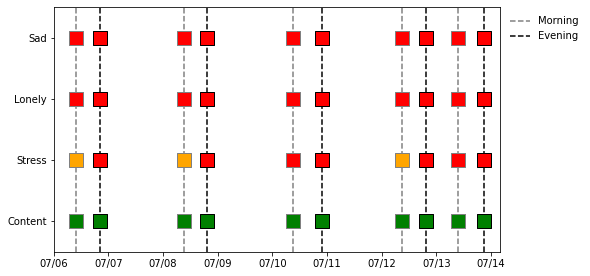

In [71]:
fig, ax = plt.subplots(figsize=(8,4.5))
# Plotting submission Times
for i in range(len(morning_b19)):
    if i == 0:
        ax.axvline(morning_b19.index[i],color='gray',linestyle='dashed',zorder=1,label='Morning')
        ax.axvline(evening_b19.index[i],color='black',linestyle='dashed',zorder=2,label='Evening')
    else:
        ax.axvline(morning_b19.index[i],color='gray',linestyle='dashed',zorder=1)
        ax.axvline(evening_b19.index[i],color='black',linestyle='dashed',zorder=2)
        
# Plotting mood scores
i = 0
for df in [morning_b19,evening_b19]:
    j = 0
    for mood, color in zip(['Content','Stress','Lonely','Sad'],['seagreen','firebrick','gray','navy']):
        ys = []
        shades = []
        for val in df[mood]:
            if val == 0:
                shades.append('red')
            elif val == 1:
                shades.append('orange')
            elif val == 2:
                shades.append('blue')
            elif val == 3:
                shades.append('green')
            else:
                shades.append('white')
                
            ys.append(j)
       
        if i == 0:
            ax.scatter(df.index,ys,color=shades,edgecolor='gray',marker='s',s=200,zorder=10)
        else:
            ax.scatter(df.index,ys,color=shades,edgecolor='black',marker='s',s=200,zorder=10)
            
        j += 1
    i+= 1

# Formatting x-axis
ax.set_xlim([datetime(2020,7,6),datetime(2020,7,14,4)])
ax.xaxis.set_major_locator(mdates.DayLocator())
myFmt = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(myFmt)

# Formatting y-axis
ax.set_ylim([-0.5,3.5])
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(['Content','Stress','Lonely','Sad'])
ax.legend(loc='upper center',bbox_to_anchor=(1.1,1),ncol=1,frameon=False)

plt.savefig('../reports/BuildSys2020/beiwe_mood.pdf')
plt.show()
plt.close()

Figure is decent and the iffy parts can be removed in illustrator.